In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('/Users/jhajhajhajha1/Desktop/Hanyang Data/data_playaround.csv')

In [6]:
data = dataset.iloc[:, 0:19]

In [7]:
print(len(data))
data[1000:1010]

46858


,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,house_lat,house_lon,work_lat,work_lon,H_ZONE,H_ZONE_X,H_ZONE_Y,W_ZONE_X,W_ZONE_Y,0
1000,88,4.0,3.0,1.0,5.0,1.0,40.0,1.0,4.0,37.511534,126.902390,37.031954,127.077127,954.0,191000.0,445000.0,207000.0,393000.0,25940.567472
1001,88,3.0,3.0,4.0,2.0,2.0,61.0,1.0,6.0,37.000396,127.106922,37.034933,127.078710,50.0,209000.0,389000.0,207000.0,393000.0,25940.567472
1002,88,5.0,3.0,1.0,4.0,1.0,46.0,1.0,4.0,37.195733,127.034267,37.039019,127.077925,287.0,203000.0,411000.0,207000.0,393000.0,25940.567472
1003,88,4.0,4.0,2.0,6.0,1.0,49.0,1.0,6.0,37.067362,127.056343,37.037719,127.077653,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1004,88,4.0,2.0,1.0,3.0,1.0,37.0,1.0,4.0,37.151695,127.078077,37.039019,127.077925,218.0,207000.0,405000.0,207000.0,393000.0,25940.567472
1005,88,3.0,3.0,1.0,5.0,1.0,56.0,1.0,6.0,37.053694,127.047655,37.038303,127.082699,105.0,205000.0,395000.0,207000.0,393000.0,25940.567472
1006,88,3.0,3.0,4.0,6.0,1.0,55.0,1.0,6.0,37.102160,127.021462,37.036618,127.077674,173.0,201000.0,401000.0,207000.0,393000.0,25940.567472
1007,88,4.0,4.0,2.0,5.0,1.0,41.0,1.0,6.0,37.037146,127.029241,37.035418,127.074294,86.0,203000.0,393000.0,207000.0,393000.0,25940.567472
1008,88,1.0,1.0,2.0,4.0,1.0,49.0,1.0,6.0,37.076516,127.064009,37.036774,127.072348,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1009,88,3.0,3.0,1.0,5.0,1.0,43.0,1.0,6.0,36.989866,127.090719,37.037373,127.088846,35.0,209000.0,387000.0,207000.0,393000.0,25940.567472


In [8]:
# preprocessing

# not calculating distance, simply using latitude
x = data.iloc[:, 0:13]
x = x.drop(["house_lat", "house_lon"], axis= 1)
x.head()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
0,0,4.0,4.0,1.0,5.0,1.0,41.0,1.0,4.0,36.115620,126.792747
1,0,3.0,3.0,2.0,3.0,1.0,36.0,1.0,4.0,37.335447,126.677584
2,0,3.0,3.0,2.0,2.0,1.0,70.0,1.0,9.0,36.975082,127.436894
3,0,5.0,4.0,1.0,5.0,1.0,32.0,1.0,4.0,36.847868,127.414170
4,0,2.0,2.0,4.0,3.0,1.0,55.0,1.0,4.0,37.967527,124.717824


In [9]:
x.isnull().sum()

W_ZONE          0
no_hh         180
no_hh_chil    180
hh_type       180
hh_income     180
no_car        180
age           180
sex           180
job_type      180
work_lat      180
work_lon      180
dtype: int64

In [10]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(x.iloc[:, 1:10])
# x.iloc[:, 1:10] = imputer.transform(x.iloc[:, 1:10])
x = x.dropna()

In [11]:
x.isnull().sum()

W_ZONE        0
no_hh         0
no_hh_chil    0
hh_type       0
hh_income     0
no_car        0
age           0
sex           0
job_type      0
work_lat      0
work_lon      0
dtype: int64

In [12]:
# category values: hh_type, hh_income (this one is fine because of the levels)
# Encoding categorical data


In [13]:
y = data.loc[:, ["house_lat", "house_lon"]]
y.head()

,house_lat,house_lon
0,37.453952,126.716877
1,37.465845,126.717234
2,37.229621,127.284122
3,37.623500,127.083187
4,37.469676,126.644354


In [14]:
y.isnull().sum()

house_lat    180
house_lon    180
dtype: int64

In [15]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(y)
# y = imputer.transform(y)
y = y.dropna()

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Random Forest Regression
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [28]:
# accuracy based on distance
def accuracy(pred):
    sum_error = 0
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        sum_error += error
    return sum_error

def ind_diff(pred):
    diff = []
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        diff.append(error)
    return pd.DataFrame({'Difference': diff})


In [22]:
accuracy(prediction)

827.7624369181993

In [23]:
prediction.head()

,house_lat,house_lon,house_lat (pred),house_lon (pred)
25714,37.607582,127.348879,37.551740,127.427998
34775,37.594757,127.153212,37.614123,127.119752
24939,37.514340,127.062632,37.513213,127.037118
4528,37.469662,126.701077,37.354121,127.034295
3767,37.440188,126.798281,37.294585,127.007107


In [32]:
difference = ind_diff(prediction)

In [33]:
difference.head()

,Difference
0,0.096841
1,0.038660
2,0.025539
3,0.352681
4,0.254576


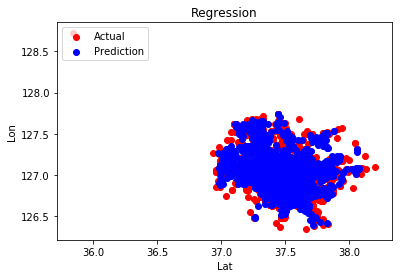

In [34]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [35]:
# SVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Svr = SVR(kernel = 'rbf')
regressor = MultiOutputRegressor(Svr)
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [38]:
accuracy(prediction)

895.4992967112057

In [39]:
difference = ind_diff(prediction)

In [40]:
difference.head()

,Difference
0,0.096250
1,0.121615
2,0.029366
3,0.384996
4,0.262974


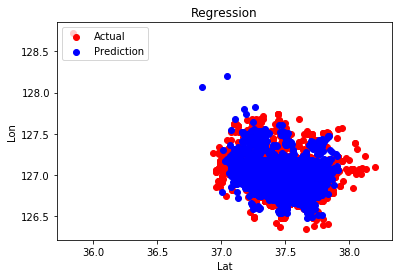

In [41]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [43]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu', input_dim = 11))
regressor.add(Dropout(0.25))

# Adding the second hidden layer
regressor.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the third hidden layer
regressor.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the fourth hidden layer
regressor.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the fifth hidden layer
regressor.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1536      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
__________

In [ ]:
regressor.fit(X_train, y_train, batch_size = 10, epochs = 270)

Epoch 1/500
37342/37342 [==============================] - 14s 383us/step - loss: 130.6573 - mean_absolute_error: 6.7568
Epoch 2/500
37342/37342 [==============================] - 11s 295us/step - loss: 45.6428 - mean_absolute_error: 4.7695
Epoch 3/500
37342/37342 [==============================] - 12s 327us/step - loss: 37.0504 - mean_absolute_error: 4.2912
Epoch 4/500
37342/37342 [==============================] - 12s 327us/step - loss: 32.8972 - mean_absolute_error: 4.0239
Epoch 5/500
37342/37342 [==============================] - 13s 351us/step - loss: 31.5888 - mean_absolute_error: 3.9477
Epoch 6/500
37342/37342 [==============================] - 13s 358us/step - loss: 29.2891 - mean_absolute_error: 3.7896
Epoch 7/500
37342/37342 [==============================] - 13s 359us/step - loss: 27.2162 - mean_absolute_error: 3.6469
Epoch 8/500
37342/37342 [==============================] - 14s 377us/step - loss: 25.3348 - mean_absolute_error: 3.5189
Epoch 9/500
37342/37342 [==============

37342/37342 [==============================] - 9s 253us/step - loss: 9.6926 - mean_absolute_error: 1.8942
Epoch 69/500
37342/37342 [==============================] - 10s 258us/step - loss: 9.5431 - mean_absolute_error: 1.8728
Epoch 70/500
37342/37342 [==============================] - 9s 253us/step - loss: 9.4886 - mean_absolute_error: 1.8673
Epoch 71/500
37342/37342 [==============================] - 10s 260us/step - loss: 9.4990 - mean_absolute_error: 1.85931s - loss:
Epoch 72/500
37342/37342 [==============================] - 12s 332us/step - loss: 9.3249 - mean_absolute_error: 1.8403
Epoch 73/500
37342/37342 [==============================] - 12s 326us/step - loss: 9.1164 - mean_absolute_error: 1.8136
Epoch 74/500
37342/37342 [==============================] - 12s 309us/step - loss: 9.0352 - mean_absolute_error: 1.8025
Epoch 75/500
37342/37342 [==============================] - 12s 331us/step - loss: 8.9010 - mean_absolute_error: 1.7825
Epoch 76/500
37342/37342 [===================

37342/37342 [==============================] - 13s 348us/step - loss: 3.4821 - mean_absolute_error: 1.1189
Epoch 136/500
37342/37342 [==============================] - 12s 333us/step - loss: 3.3468 - mean_absolute_error: 1.0982
Epoch 137/500
37342/37342 [==============================] - 12s 326us/step - loss: 3.3112 - mean_absolute_error: 1.0924
Epoch 138/500
37342/37342 [==============================] - 11s 296us/step - loss: 3.3077 - mean_absolute_error: 1.0894
Epoch 139/500
37342/37342 [==============================] - 9s 248us/step - loss: 3.1981 - mean_absolute_error: 1.0740
Epoch 140/500
37342/37342 [==============================] - 9s 246us/step - loss: 3.1204 - mean_absolute_error: 1.0643
Epoch 141/500
37342/37342 [==============================] - 9s 245us/step - loss: 3.0578 - mean_absolute_error: 1.0504
Epoch 142/500
37342/37342 [==============================] - 9s 251us/step - loss: 3.0182 - mean_absolute_error: 1.0452
Epoch 143/500
37342/37342 [=======================

Epoch 203/500
37342/37342 [==============================] - 10s 280us/step - loss: 0.4019 - mean_absolute_error: 0.4162
Epoch 204/500
37342/37342 [==============================] - 11s 302us/step - loss: 0.3837 - mean_absolute_error: 0.4083
Epoch 205/500
37342/37342 [==============================] - 10s 273us/step - loss: 0.3636 - mean_absolute_error: 0.3974
Epoch 206/500
37342/37342 [==============================] - 13s 347us/step - loss: 0.3404 - mean_absolute_error: 0.3872
Epoch 207/500
37342/37342 [==============================] - 16s 416us/step - loss: 0.3208 - mean_absolute_error: 0.3775
Epoch 208/500
37342/37342 [==============================] - 14s 378us/step - loss: 0.3028 - mean_absolute_error: 0.3688
Epoch 209/500
37342/37342 [==============================] - 12s 313us/step - loss: 0.2875 - mean_absolute_error: 0.3598
Epoch 210/500
37342/37342 [==============================] - 12s 327us/step - loss: 0.2681 - mean_absolute_error: 0.3487
Epoch 211/500
37342/37342 [=====

37342/37342 [==============================] - 15s 403us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 271/500
37342/37342 [==============================] - 13s 340us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 272/500
37342/37342 [==============================] - 13s 335us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 273/500
37342/37342 [==============================] - 11s 290us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 274/500
37342/37342 [==============================] - 12s 317us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 275/500
37342/37342 [==============================] - 10s 268us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 276/500
37342/37342 [==============================] - 11s 284us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 277/500
37342/37342 [==============================] - 12s 331us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 278/500
37342/37342 [===================

In [66]:
y_pred = regressor.predict(X_test)

In [67]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [69]:
len(y_pred)

9336

In [42]:
accuracy(prediction)

1976.3369786078272

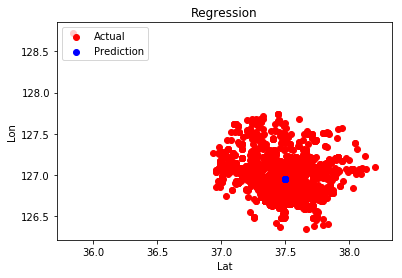

In [52]:
# plot?
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# grid-search
